# Data Cleaning and EDA with Time Series Data
GitHub link: https://github.com/psenrique/AAI530_ASSIGNMENT2


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#use this cell to import additional libraries or define helper functions

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [3]:
!wget https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip
!unzip individual+household+electric+power+consumption.zip
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

--2024-01-17 01:12:08--  https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘individual+household+electric+power+consumption.zip’

individual+househol     [     <=>            ]  19.68M  21.8MB/s    in 0.9s    

2024-01-17 01:12:09 (21.8 MB/s) - ‘individual+household+electric+power+consumption.zip’ saved [20640916]

Archive:  individual+household+electric+power+consumption.zip
  inflating: household_power_consumption.txt  


<ipython-input-3-fd79d89e79db>:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")


In [4]:
print(df_raw.head())

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [5]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [6]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [7]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()

In [8]:
#create your Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [9]:
#convert all data columns to numeric types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [10]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [11]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [12]:
df.Date[0]

datetime.date(2006, 12, 16)

In [13]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [14]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
print(desc)

      Global_active_power Global_reactive_power       Voltage  \
count        2049280.0000          2049280.0000  2049280.0000   
mean               1.0916                0.1237      240.8399   
min                0.0760                0.0000      223.2000   
25%                0.3080                0.0480      238.9900   
50%                0.6020                0.1000      241.0100   
75%                1.5280                0.1940      242.8900   
max               11.1220                1.3900      254.1500   
std                1.0573                0.1127        3.2400   

      Global_intensity Sub_metering_1 Sub_metering_2 Sub_metering_3  \
count     2049280.0000   2049280.0000   2049280.0000   2049280.0000   
mean            4.6278         1.1219         1.2985         6.4584   
min             0.2000         0.0000         0.0000         0.0000   
25%             1.4000         0.0000         0.0000         0.0000   
50%             2.6000         0.0000         0.0000       

Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

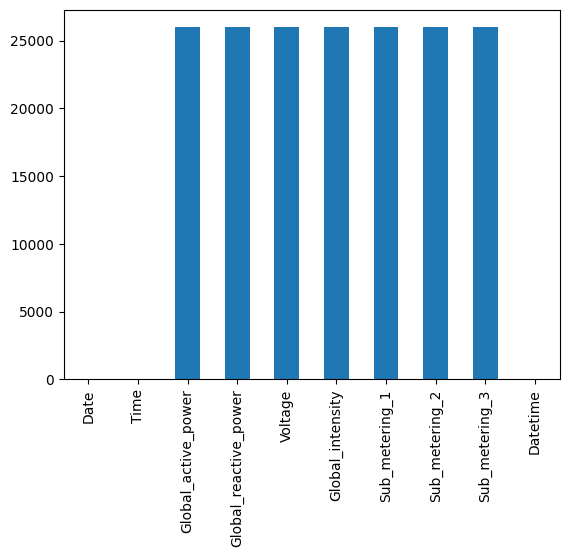

In [15]:
df.isna().sum().plot.bar()

<Axes: xlabel='Date'>

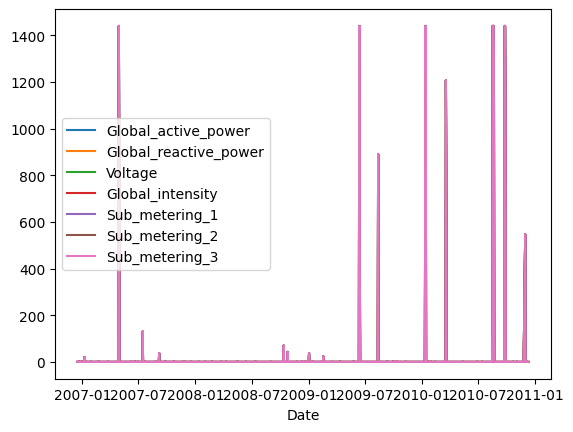

In [16]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
# df_na.plot('Date', df_na.columns[3:-1].all())
df_na.plot(x='Date',y=['Global_active_power','Global_reactive_power','Voltage','Global_intensity',
                       'Sub_metering_1','Sub_metering_2','Sub_metering_3'])

**Q: What do you notice about the pattern of missing data?**

A: It appears that the variables are missing data on the same dates. More data is missing towards the end of the time series than the start. From the count row in the describe function it can be seen that all variables are missing the same amount of data.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: Since all the variables are missing data at the same instance it would be easiest to remove instances that contain NaN values. This way the same amount of instances are being removed for each variable. Additionally, there are 25979 missing values which is about 1.25% of the data, and not a significant loss.

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [17]:
#clean up missing data here
df = df.dropna()

In [18]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
print(desc)

      Global_active_power Global_reactive_power       Voltage  \
count        2049280.0000          2049280.0000  2049280.0000   
mean               1.0916                0.1237      240.8399   
min                0.0760                0.0000      223.2000   
25%                0.3080                0.0480      238.9900   
50%                0.6020                0.1000      241.0100   
75%                1.5280                0.1940      242.8900   
max               11.1220                1.3900      254.1500   
std                1.0573                0.1127        3.2400   

      Global_intensity Sub_metering_1 Sub_metering_2 Sub_metering_3  \
count     2049280.0000   2049280.0000   2049280.0000   2049280.0000   
mean            4.6278         1.1219         1.2985         6.4584   
min             0.2000         0.0000         0.0000         0.0000   
25%             1.4000         0.0000         0.0000         0.0000   
50%             2.6000         0.0000         0.0000       

## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: global_active_power*1000/60, sub_metering_1, sub_metering_2, and sub_metering_3 are chosen to be compared since they are measured in the same unit (Watt-hour) and can be easily compared visually. Additionally, the sub meterings are related to different rooms and appliance usages while the global active power is the total usage. It is interesting to visualize the power usage from different areas of the house to the total usage.

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

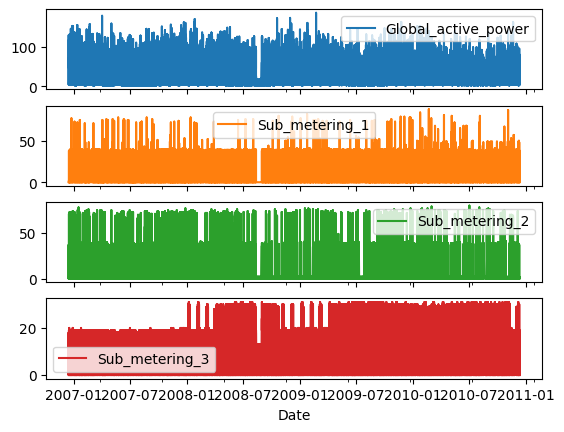

In [19]:
#build your line chart here
df['Global_active_power'] = df['Global_active_power']*1000/60
df.plot('Date', ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], subplots = True)

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A:The visualization is not very useful as there is a lot of noise and variation from day to day. The trends in the data are difficult to see and it is difficult to make valuable insights from this visualization.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).**

In [20]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
df_date = df.groupby(pd.PeriodIndex(df['Datetime'], freq="M"))['Global_active_power', 'Sub_metering_1','Sub_metering_2','Sub_metering_3'].mean().reset_index()

<ipython-input-20-365f0bef34a0>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_date = df.groupby(pd.PeriodIndex(df['Datetime'], freq="M"))['Global_active_power', 'Sub_metering_1','Sub_metering_2','Sub_metering_3'].mean().reset_index()


array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>], dtype=object)

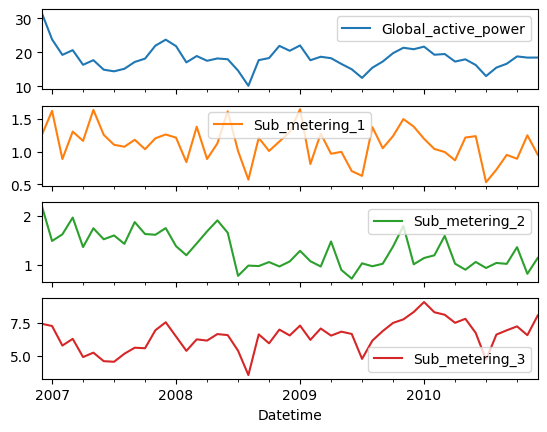

In [21]:
#build your linechart here
df_date.plot('Datetime',['Global_active_power', 'Sub_metering_1','Sub_metering_2','Sub_metering_3'], subplots = True)

**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: Global_active_power and Sub_metering_3 have a similar trend with minimums and peaks aligning. Sub_metering_1 and Sub_metering_2 do not seem to be as related with any of the other variables. From these graphs it can be deduced that the total energy usage is mainly from the appliances in Sub_metering_3 that include the electric water-heater and the air-conditioner.   

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [22]:
#compute your moving average here
time_30 = 30*24*60
df[['Global_active_power_moving_avg', 'Sub_metering_1_moving_avg', 'Sub_metering_2_moving_avg',
    'Sub_metering_3_moving_avg']] = df[['Global_active_power', 'Sub_metering_1',
                                       'Sub_metering_2','Sub_metering_3']].rolling(time_30).mean()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

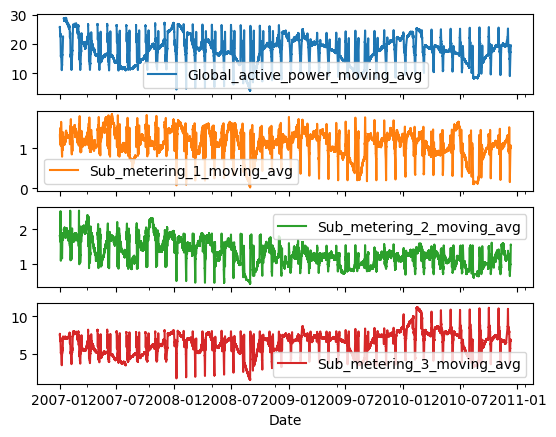

In [23]:
#build your line chart on the moving average here
df.plot('Date', ['Global_active_power_moving_avg', 'Sub_metering_1_moving_avg',
                 'Sub_metering_2_moving_avg', 'Sub_metering_3_moving_avg'], subplots = True)

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: The moving average has a similar trend as the monthly average with the addition of noise. The monthly average is more efficient to analyze the data as it does not contain the noise and produces clearer visualizations.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

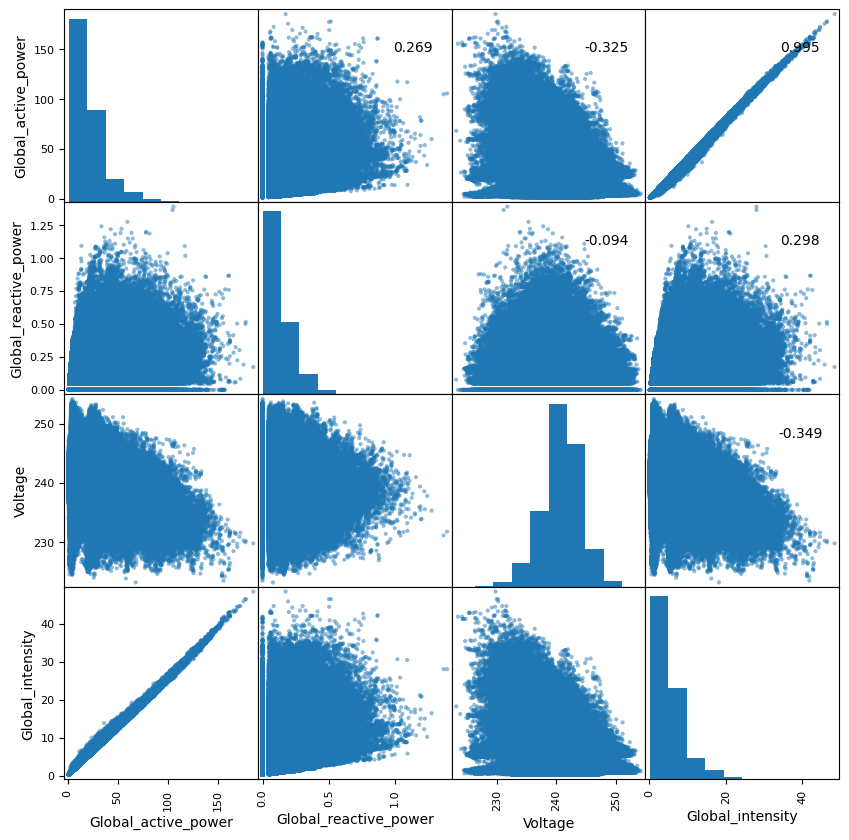

In [24]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: From the correlation matrix it can be seen that the Global_intesity variable and the Global_active_power variable have a very strong positive linear relationship. This can be expected as the active power can be calculated using a linear equation:   
active power (kW) = intensity (A) * voltage (V) / 1000  
  
  The remaining variables have little to no correlation. Depending on the task will determine which of the variables need to be analyzed. However, only one of the two variables Global_intesity and Global_active_power should be used since it is known that they are so closely correlated and contain the same information so by using both they can hide the effect of each other in the model.